In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
import re
import os
import matplotlib.pyplot as plt

tf.__version__
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# def clean_data(text):
#     text = text.lower()
#     text = re.sub(r"[-=+*\"#@!$%^&()`<>/[\]]","",text)
#     text = re.sub(r"i'm","i am",text)
#     text = re.sub(r"he's","he is",text)
#     text = re.sub(r"she's","she is",text)
#     text = re.sub(r"it's","it is",text)
#     text = re.sub(r"they're","they are",text)
#     text = re.sub(r"there're","there are",text)
#     text = re.sub(r"there's","there is",text)
#     text = re.sub(r"how're","how are",text)
#     text = re.sub(r"what're","what are",text)
#     text = re.sub(r"where're","where ",text)
#     text = re.sub(r"who're","who are",text)
#     text = re.sub(r"that're","that are",text)
#     text = re.sub(r"when're","when are",text)
#     text = re.sub(r"how's","how is",text)
#     text = re.sub(r"what's","what is",text)
#     text = re.sub(r"where's","where is",text)
#     text = re.sub(r"who's","who is",text)
#     text = re.sub(r"that's","that is",text)
#     text = re.sub(r"when's","when is",text)
#     text = re.sub(r"won't","would not",text)
#     text = re.sub(r"nt't","can not",text)
#     text = re.sub(r"\'bout'","about",text)
#     text = re.sub(r"\'till'","untill",text)
#     text = re.sub(r"\'ll","will",text)
#     text = re.sub(r"\'ve","have",text)
#     text = re.sub(r"\'re","are",text)
#     text = re.sub(r"\'d","would",text)
#     text = re.sub(r"\."," ",text)
#     text = re.sub(r"\,"," ",text)
#     text = re.sub(r"\!"," ",text)
#     text = re.sub(r"\?"," ",text)
#     text = re.sub(r"\;"," ",text)
#     text = re.sub(r"\:"," ",text)
#     return text

    
# df_train['text'] = df_train['text'].apply(clean_data)
# df_train['augmented_text'] = df_train['augmented_text'].apply(clean_data)
# df_val['text'] = df_val['text'].apply(clean_data)
# df_val['augmented_text'] = df_val['augmented_text'].apply(clean_data)
# df_test['text'] = df_test['text'].apply(clean_data)
# df_test['augmented_text'] = df_test['augmented_text'].apply(clean_data)
# data = pd.concat([df_train,df_val,df_test])


In [ ]:
# data.to_csv('/content/drive/MyDrive/Colab_Notebooks/data.csv',index=False,)

In [5]:
#data.csv is being pre-process to save time for training
data = pd.read_csv('/content/drive/MyDrive/255/data.csv')

In [ ]:
print(data.isnull().sum())
data = data.drop_duplicates(subset=['augmented_text'])
# data = (data[data["augmented_text"] != "name"])
print(data.duplicated().sum())

In [7]:
df = data

In [ ]:
df.describe()

In [8]:

train_df = df['augmented_text']
test_df = df['text']
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(train_df, test_df, test_size=0.2, random_state=0)
val_x, test_x,val_y, test_y = train_test_split(test_x, test_y, test_size = 0.5, random_state=42)


In [10]:
train_x

500251                nidai finally aodtps twenty20 cricket
599132        same sex awopti8n paedes victorian parliament
513573             hobaes housing affordability remaone low
84275                      qccusfd klllef collapses in dock
570535                 pumpkin growers ophe for better year
                                ...                        
882371    australian sas spldiees kkled the wrong afggwn...
152315         eashingron whitaker to jkjn forces on sfrden
117952    clinton narrowly defea6d sand2rx in kentucky l...
435829    road hazard  tasmanian highwwus amohb the nati...
305711    jit repdase phone caloz syiwing comms between ...
Name: augmented_text, Length: 737895, dtype: object

In [11]:
train_y

500251                india finally adopts twenty20 cricket
599132        same sex adoption passes victorian parliament
513573            hobarts housing affordability remains low
84275                      accused killer collapses in dock
570535                 pumpkin growers hope for better year
                                ...                        
882371    australian sas soldiers killed the wrong afgha...
152315         washington whitaker to join forces on screen
117952    clinton narrowly defeats sanders in kentucky p...
435829    road hazard  tasmanian highways among the nati...
305711    jit release phone calls showing comms between ...
Name: text, Length: 737895, dtype: object

In [12]:
max_length = 74

In [13]:

g_text_tokenizer = Tokenizer(char_level=True)
g_text_tokenizer.fit_on_texts(train_x)
g_text_word_index = g_text_tokenizer.word_index
train_sequences = g_text_tokenizer.texts_to_sequences(train_x)
train_padded = pad_sequences(train_sequences, maxlen = max_length, padding='post')


text_tokenizer = Tokenizer(char_level=True)
text_tokenizer.fit_on_texts(train_y)
text_word_index = text_tokenizer.word_index
test_sequences = text_tokenizer.texts_to_sequences(train_y)
test_padded = pad_sequences(test_sequences,maxlen = max_length, padding='post')





In [14]:
text_tokenizer.word_index

{' ': 1,
 "'": 32,
 '0': 27,
 '1': 29,
 '2': 30,
 '3': 33,
 '4': 34,
 '5': 31,
 '6': 35,
 '7': 37,
 '8': 38,
 '9': 36,
 'a': 3,
 'b': 19,
 'c': 11,
 'd': 12,
 'e': 2,
 'f': 18,
 'g': 17,
 'h': 14,
 'i': 7,
 'j': 24,
 'k': 23,
 'l': 10,
 'm': 15,
 'n': 9,
 'o': 6,
 'p': 16,
 'q': 26,
 'r': 4,
 's': 5,
 't': 8,
 'u': 13,
 'v': 22,
 'w': 20,
 'x': 25,
 'y': 21,
 'z': 28}

In [15]:
val_train_sequences = g_text_tokenizer.texts_to_sequences(val_x)
val_train_padded = pad_sequences(val_train_sequences, maxlen = max_length, padding='post')

val_test_sequences = text_tokenizer.texts_to_sequences(val_y)
val_test_padded = pad_sequences(val_test_sequences, maxlen = max_length, padding='post')

In [16]:
g_vocab_size = len(g_text_word_index)+1
vocab_size = len(text_word_index)+1
print(g_vocab_size, vocab_size)

41 39


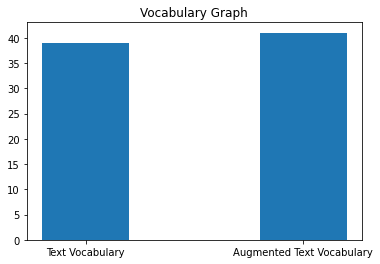

In [17]:
voc = ["Text Vocabulary", "Augmented Text Vocabulary"]
voc_count = [vocab_size, g_vocab_size]

plt.bar(voc, voc_count, width = 0.4)
plt.title("Vocabulary Graph")
plt.show()

In [18]:
temp_test_padded = test_padded.reshape((test_padded.shape[0], test_padded.shape[1],1))


In [19]:
epoch = 40

In [22]:
# Reference from this paper, "Towards better decoding and language model integration in sequence to sequence models" https://arxiv.org/abs/1612.02695 and this video https://www.youtube.com/watch?v=QuvRWevJMZ4

model_2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=g_vocab_size, output_dim=64, input_length=max_length, mask_zero=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.RepeatVector(max_length),
    tf.keras.layers.LSTM(64,return_sequences=True),
    tf.keras.layers.LSTM(64,return_sequences=True),
    # tf.keras.layers.LSTM(128,return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(vocab_size,activation='softmax')
])
learning_rate = 0.001
# learning_rate = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate)

# optimizer = tf.keras.optimizers.RMSprop(learning_rate)
# optimizer = tf.keras.mixed_precision.LossScaleOptimizer(optimizer)
model_2.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=['accuracy'])
model_2.summary(expand_nested=True,
    show_trainable=True)

Model: "sequential_1"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 embedding_2 (Embedding)     (None, 74, 64)            2624      Y          
                                                                            
 lstm_5 (LSTM)               (None, 64)                33024     Y          
                                                                            
 batch_normalization_1 (Batc  (None, 64)               256       Y          
 hNormalization)                                                            
                                                                            
 repeat_vector (RepeatVector  (None, 74, 64)           0         Y          
 )                                                                          
                                                                            
 lstm_6 (LSTM)               (None, 74, 64)           

Epoch 1/40
3844/3844 [==============================] - 115s 27ms/step - loss: 1.7929 - accuracy: 0.4798 - val_loss: 1.7262 - val_accuracy: 0.4808
Epoch 2/40
3844/3844 [==============================] - 99s 26ms/step - loss: 1.6112 - accuracy: 0.4997 - val_loss: 1.5452 - val_accuracy: 0.5144
Epoch 3/40
3844/3844 [==============================] - 100s 26ms/step - loss: 1.4729 - accuracy: 0.5326 - val_loss: 1.4022 - val_accuracy: 0.5523
Epoch 4/40
3844/3844 [==============================] - 100s 26ms/step - loss: 1.3858 - accuracy: 0.5626 - val_loss: 1.3455 - val_accuracy: 0.5767
Epoch 5/40
3844/3844 [==============================] - 101s 26ms/step - loss: 1.3350 - accuracy: 0.5824 - val_loss: 1.2937 - val_accuracy: 0.5976
Epoch 6/40
3844/3844 [==============================] - 100s 26ms/step - loss: 1.2993 - accuracy: 0.5990 - val_loss: 1.2884 - val_accuracy: 0.6013
Epoch 7/40
3844/3844 [==============================] - 103s 27ms/step - loss: 1.2730 - accuracy: 0.6111 - val_loss: 1.

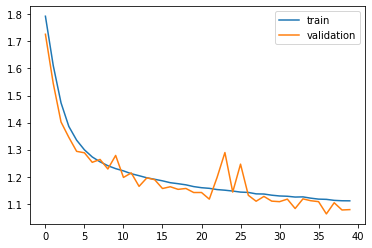

In [23]:
his_2 = model_2.fit(train_padded, test_padded, batch_size=192, epochs=epoch, validation_data = (val_train_padded, val_test_padded))

plt.plot(his_2.history['loss'])
plt.plot(his_2.history['val_loss'])
plt.legend(['train','validation'])
plt.show()

In [24]:
test_sample = test_x.iloc[:10]
test_sample = g_text_tokenizer.texts_to_sequences(test_sample)
test_sample = pad_sequences(test_sample, maxlen=max_length, padding='post')


In [25]:
test_x.iloc[:10]

886591             odnwer elvaing job decision up to enlosn
77806               myanmar and mo4a/ity in timwc of criska
775903              burma reports ifrts human ibdr flu aces
755900    eurovision e0e0 big night in ausfraliq votes w...
122077               prime minister qlahs png bospotal plan
708417                    anbkruptcy revelation at the ticc
798506     mlfe time for say on  oolo0laba dput master plan
810503               horsey opens tjee shif  eas in denmark
590110       conuicl to offer public more asleyrads dtaeils
577353       weomns abseblal team rppeares for title charge
Name: augmented_text, dtype: object

In [26]:
test_y.iloc[:10]

886591             downer leaving job decision up to nelson
77806               myanmar and morality in times of crisis
775903              burma reports first human bird flu case
755900    eurovision 2020 big night in australia votes w...
122077               prime minister slams png hospital plan
708417                    bankruptcy revelation at the tcci
798506     more time for say on mooloolaba spit master plan
810503              horsey opens three shot lead in denmark
590110       council to offer public more saleyards details
577353       womens baseball team prepares for title charge
Name: text, dtype: object

In [29]:
pre = model_2.predict(test_sample)
def deTokenize(logits):
    index_to_words = {id: word for word, id in text_tokenizer.word_index.items()}
    index_to_words[0] = ''
    pre_index = np.argmax(logits, 1)
    return ''.join(index_to_words[prediction] for prediction in pre_index)
predict = []
for i in range(10):
  predict.append(deTokenize(pre[i]))

In [30]:
eva = pd.DataFrame({'input': test_x.iloc[:10], 'output': test_y.iloc[:10], 'predict':predict})
eva


,input,output,predict
886591,odnwer elvaing job decision up to enlosn,downer leaving job decision up to nelson,voveer eelaing oor decciion uo pp oiiin
77806,myanmar and mo4a/ity in timwc of criska,myanmar and morality in times of crisis,mamaaay and coplaain in hhaal of cccccl
775903,burma reports ifrts human ibdr flu aces,burma reports first human bird flu case,burml reports frrtt thinn bife fir aas
755900,eurovision e0e0 big night in ausfraliq votes w...,eurovision 2020 big night in australia votes w...,ruciiiiion peep oie gight in susseaaal iiie ...
122077,prime minister qlahs png bospotal plan,prime minister slams png hospital plan,prove minister aaaas nn ropppal plal
708417,anbkruptcy revelation at the ticc,bankruptcy revelation at the tcci,annbrpptts reeeaation at tte ccic
798506,mlfe time for say on oolo0laba dput master plan,more time for say on mooloolaba spit master plan,mome come for sta in o ooollllly aas aataa aal
810503,horsey opens tjee shif eas in denmark,horsey opens three shot lead in denmark,hootes poins tees thie a a i nnneral
590110,conuicl to offer public more asleyrads dtaeils,council to offer public more saleyards details,council to fffer puuiin core aeaeaaaas saaalle
577353,weomns abseblal team rppeares for title charge,womens baseball team prepares for title charge,wowlin aaaaalld ream srepeere tor hort aaaae


In [31]:
print("Iutput:    ",test_x.iloc[7])
print("Actual:    ",test_y.iloc[7])
print("Predicted: ",deTokenize(pre[7]))

Iutput:     horsey opens tjee shif  eas in denmark
Actual:     horsey opens three shot lead in denmark
Predicted:  hootes poins tees thie a  a  i nnneral
